<h1><center>Module 17: Lesson 5 Evaluating performance assignment</center></h1>

## Assignments

As in previous checkpoints, please submit links to two Juypyter notebooks (one for each assignment below).


### 1. Weather model

For this assignment, you'll revisit the historical temperature dataset. To complete this assignment, submit a link a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Like in the previous checkpoint, build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why? 
* Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one? 
* Add *visibility* as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the *visibility* in terms of the improvement in the adjusted R-squared. Which one is more useful?
* Choose the best one from the three models above with respect to their AIC and BIC scores. Validate your choice by discussing your justification with your mentor.


###  2. House prices model

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
* Do you think your model is satisfactory? If so, why?
* In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. 
* For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

_________________________________________________________________________________________________________________

##### Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)

_________________________________________________________________________________________________________________

## Question 1

##### Grab data

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

##### Part 1
Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. What are the R-squared and adjusted R-squared values? Do you think they are satisfactory? Why?

In [3]:
#create variable diff_temp...
weather_df['diff_temp'] = weather_df['temperature'] - weather_df['apparenttemperature']

In [6]:
# Y is the target variable
Y = weather_df['diff_temp']
# X is the feature set which includes
# is_male and is_smoker variables
X = weather_df[['humidity','windspeed']]

X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diff_temp   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:40:41   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4381      0.021   -115.948      0.0

> The R-squared and adjusted R-squared are extremely low, meaning that they barely explain any of the variance/outcome in the dependent variable of temperature difference.

##### Part 2
Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Now, what is the R-squared of this model? Does this model improve upon the previous one?

In [7]:
weather_df['humidity_windspeed'] = weather_df['humidity'] * weather_df['windspeed']

In [18]:
# Y is the target variable
Y = weather_df['diff_temp']
# X is the feature set which includes
# is_male and is_smoker variables
X = weather_df[['humidity','windspeed', 'humidity_windspeed']]

X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diff_temp   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:07:54   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0839      0

>The R-squared does improve from 0.28 to 0.34. This does improve upon the previous model, and also significantly changes the coefficients from the previous model, which is odd.

##### Part 3

Add visibility as an additional explanatory variable to the first model and estimate it. Did R-squared increase? What about adjusted R-squared? Compare the differences put on the table by the interaction term and the visibility in terms of the improvement in the adjusted R-squared. Which one is more useful?

In [9]:
# Y is the target variable
Y = weather_df['diff_temp']
# X is the feature set which includes
# is_male and is_smoker variables
X = weather_df[['humidity','windspeed', 'visibility']]

X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              diff_temp   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 1.401e+04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:58:34   Log-Likelihood:            -1.6938e+05
No. Observations:               96453   AIC:                         3.388e+05
Df Residuals:                   96449   BIC:                         3.388e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5756      0.028    -56.605      0.0

>Adding visibility to the first model increases the adjusted R-squared to 0.3. This is a smaller adjustment than the increase that resulted from adding the interaction term in the second attempt.

##### Part 4

Choose the best one from the three models above with respect to their AIC and BIC scores. Validate your choice by discussing your justification with your mentor.

In [19]:
# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
predictions = lrm.predict(X)
errors = Y - predictions

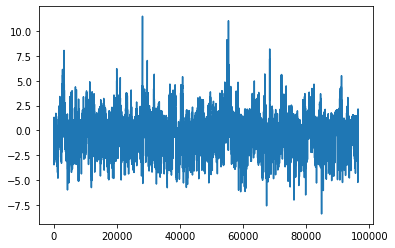

In [21]:
plt.plot(errors)
plt.show()

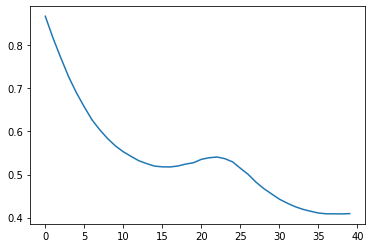

In [22]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

_________________________________________________________________________________________________________________

## Question 2

##### Grab data

In [10]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

##### Part 1

Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.

In [23]:
# Y is the target variable
Y = houseprices_df['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
X = houseprices_df[['overallqual','grlivarea', 'garagecars']]

X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1375.
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        20:09:39   Log-Likelihood:                -17563.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1456   BIC:                         3.516e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.883e+04   4842.897    -20.408      

In [24]:
# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
predictions = lrm.predict(X)
errors = Y - predictions

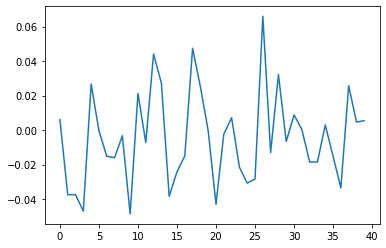

In [26]:
acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

>The p-value of the F-statistic is zero meaning that our features add some information to the reduced model and our model is useful in explaining charges. The R-squared is 0.74 meaning that the model does explain a significant degree of the dependent variable. The AIC is very close to zero, meaning the model does eplain a significant amount of the outcome.

##### Part 2

* Do you think your model is satisfactory? If so, why?

> I do think that this model is satisfactory. The adjusted R-squared is high but not too high and the p-values for the coefficients are all close to zero, meaning that the coefficient estimates are statistically significant.